In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
##creating the data point
X=6*np.random.rand(100,1)-3
Y=0.5*X**2+1.5*X+2+np.random.randn(100,1)

Text(0, 0.5, 'Y')

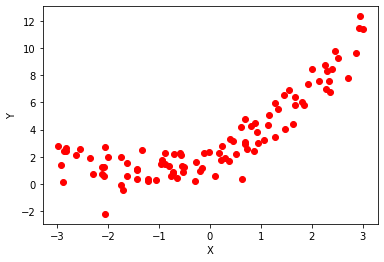

In [10]:
plt.scatter(X,Y,color="red")
plt.xlabel("X")
plt.ylabel("Y")

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=42)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
##Let's implement simple linear regression

In [13]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [14]:
regression.fit(X_train,y_train)

LinearRegression()

In [19]:
y_predict=regression.predict(X_test)

In [20]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predict)
print(score)

0.7673631859049387


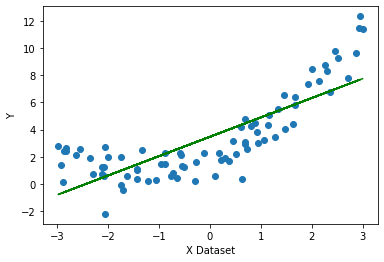

In [23]:
##lets visualize it
plt.plot(X_train,regression.predict(X_train),color='green')
plt.scatter(X_train,y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")
plt.show()

In [24]:
#let's apply polynomial features
from sklearn.preprocessing import PolynomialFeatures



In [27]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [28]:
print(X_train_poly)

[[ 1.          2.99725108  8.98351403]
 [ 1.         -0.76962503  0.59232268]
 [ 1.          0.69841418  0.48778236]
 [ 1.         -2.54481635  6.47609028]
 [ 1.          0.69552257  0.48375165]
 [ 1.          2.35427824  5.54262601]
 [ 1.         -0.87269365  0.76159421]
 [ 1.          2.51132193  6.30673783]
 [ 1.         -0.65329581  0.42679542]
 [ 1.         -2.29376519  5.26135875]
 [ 1.          1.45251016  2.10978576]
 [ 1.         -2.05735798  4.23272186]
 [ 1.         -0.55316663  0.30599332]
 [ 1.         -0.26338702  0.06937272]
 [ 1.          1.99936388  3.99745594]
 [ 1.          0.94726322  0.89730761]
 [ 1.         -2.87739183  8.27938375]
 [ 1.         -2.35992654  5.56925327]
 [ 1.         -0.59217665  0.35067318]
 [ 1.          0.30475479  0.09287548]
 [ 1.          0.44735135  0.20012323]
 [ 1.         -1.43779337  2.06724978]
 [ 1.          1.27757751  1.6322043 ]
 [ 1.         -2.63045826  6.91931066]
 [ 1.          0.69086395  0.477293  ]
 [ 1.         -1.42306758

In [35]:
regression_poly=LinearRegression()
regression_poly.fit(X_train_poly,y_train)

LinearRegression()

In [36]:
y_pred=regression_poly.predict(X_test_poly)
score2=r2_score(y_test,y_pred)
print(score2)

0.9114039301991377


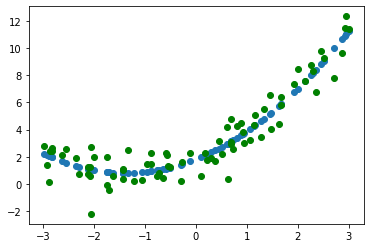

In [40]:
## plotting
plt.scatter(X_train,regression_poly.predict(X_train_poly))
plt.scatter(X_train,y_train,color="green")

In [42]:
##prediction of new data..

X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
print(X_new_poly)

[[ 1.00000000e+00 -3.00000000e+00  9.00000000e+00]
 [ 1.00000000e+00 -2.96984925e+00  8.82000455e+00]
 [ 1.00000000e+00 -2.93969849e+00  8.64182723e+00]
 [ 1.00000000e+00 -2.90954774e+00  8.46546804e+00]
 [ 1.00000000e+00 -2.87939698e+00  8.29092700e+00]
 [ 1.00000000e+00 -2.84924623e+00  8.11820409e+00]
 [ 1.00000000e+00 -2.81909548e+00  7.94729931e+00]
 [ 1.00000000e+00 -2.78894472e+00  7.77821267e+00]
 [ 1.00000000e+00 -2.75879397e+00  7.61094417e+00]
 [ 1.00000000e+00 -2.72864322e+00  7.44549380e+00]
 [ 1.00000000e+00 -2.69849246e+00  7.28186157e+00]
 [ 1.00000000e+00 -2.66834171e+00  7.12004747e+00]
 [ 1.00000000e+00 -2.63819095e+00  6.96005151e+00]
 [ 1.00000000e+00 -2.60804020e+00  6.80187369e+00]
 [ 1.00000000e+00 -2.57788945e+00  6.64551400e+00]
 [ 1.00000000e+00 -2.54773869e+00  6.49097245e+00]
 [ 1.00000000e+00 -2.51758794e+00  6.33824903e+00]
 [ 1.00000000e+00 -2.48743719e+00  6.18734375e+00]
 [ 1.00000000e+00 -2.45728643e+00  6.03825661e+00]
 [ 1.00000000e+00 -2.42713568e+

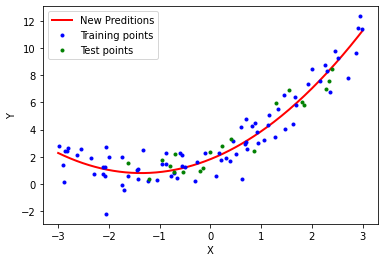

In [48]:
y_new=regression_poly.predict(X_new_poly)
plt.plot(X_new,y_new,'-r',linewidth=2,label="New Preditions")
plt.plot(X_train,y_train,'b.',label="Training points")

plt.plot(X_test,y_test,'g.',label="Test points")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

